In [5]:
pip install pandas

    100% |████████████████████████████████| 10.0MB 71kB/s eta 0:00:01
    100% |████████████████████████████████| 20.2MB 38kB/s  eta 0:00:01
    100% |████████████████████████████████| 512kB 1.7MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [1]:
from pandas import Series

In [6]:
se = Series([1,3,5,7])
print(se[2])
print(se)

5
0    1
1    3
2    5
3    7
dtype: int64


In [9]:
se2 = Series([100,200,300,400], index=['a','b','c','d'])
se2['b']

200

### Converting Dictionaries to Series

In [12]:
dicton = {'Rob':3000, 'John':4500, 'Ram':6000}
se = Series(dicton)
print(se)
print(se['Ram'])

Rob     3000
John    4500
Ram     6000
dtype: int64
6000


### Data Frames

In [15]:
from pandas import DataFrame
data = {'Name':['Rob','John','Raman'],
       'Age':[20,30,45],
       'Salary':[4500,5000,100000]}
dataframe = DataFrame(data)
dataframe

,Name,Age,Salary
0,Rob,20,4500
1,John,30,5000
2,Raman,45,100000


In [18]:
new_frame = DataFrame(data, columns=['Name','Age','Salary'])
new_frame

,Name,Age,Salary
0,Rob,20,4500
1,John,30,5000
2,Raman,45,100000


In [20]:
new_frame['Salary']

0      4500
1      5000
2    100000
Name: Salary, dtype: int64

In [23]:
new_frame.iloc[2]

Name       Raman
Age           45
Salary    100000
Name: 2, dtype: object

In [26]:
new_frame['Profile']='Doctor','Engineer','Scientist'
new_frame

,Name,Age,Salary,Profile
0,Rob,20,4500,Doctor
1,John,30,5000,Engineer
2,Raman,45,100000,Scientist


In [27]:
new_frame = new_frame.T
new_frame

,0,1,2
Name,Rob,John,Raman
Age,20,30,45
Salary,4500,5000,100000
Profile,Doctor,Engineer,Scientist


### Reindexing

In [30]:
variable = Series([100,200,300,400,500],index=['d','b','a','c','e'])
variable

d    100
b    200
a    300
c    400
e    500
dtype: int64

In [32]:
variable.reindex(['a','b','c','d','e'])

a    300
b    200
c    400
d    100
e    500
dtype: int64

In [40]:
data = {'Name':['Rob','John','Raman'],
       'Age':[20,30,45],
       'Salary':[4500,5000,100000]}
new_frame = DataFrame(data)
new_frame.reindex([2,0,1])

,Name,Age,Salary
2,Raman,45,100000
0,Rob,20,4500
1,John,30,5000


In [43]:
new_frame.reindex(columns=['Salary','Name','Age'])

,Salary,Name,Age
0,4500,Rob,20
1,5000,John,30
2,100000,Raman,45


### Deleting row and column

In [45]:
frame = new_frame.drop([1])
frame

,Name,Age,Salary
0,Rob,20,4500
2,Raman,45,100000


In [48]:
frame = new_frame.drop('Age',axis=1)
frame

,Name,Salary
0,Rob,4500
1,John,5000
2,Raman,100000


### Arithmatic operations

In [50]:
frame1 = Series([1,2,3,4,5])
frame2 = Series([100,200,300,400,500])
frame1 + frame2

0    101
1    202
2    303
3    404
4    505
dtype: int64

In [52]:
frame1 = Series([1,2,3,4,5,6,7])
frame1 + frame2

0    101.0
1    202.0
2    303.0
3    404.0
4    505.0
5      NaN
6      NaN
dtype: float64

In [57]:
data1 = {'Speed':[100,200,300],
       'Temp':[20,30,50]}

data2 = {'Speed':[200,300,200],
       'Temp':[20,10,20]}

frame1 = DataFrame(data1)
frame2 = DataFrame(data2)

frame1 + frame2

,Speed,Temp
0,300,40
1,500,40
2,500,70


### Arithmatic between dataframe and series

In [6]:
from pandas import Series
series = Series([100,200,300],index=['Speed','Temp','Humidity'])
series

Speed       100
Temp        200
Humidity    300
dtype: int64

In [8]:
from pandas import DataFrame
frame3 = DataFrame({'Speed':[154,147,354],'Temp':[123,325,201],'Humidity':[120,320,455]})
frame3

,Speed,Temp,Humidity
0,154,123,120
1,147,325,320
2,354,201,455


In [10]:
frame3-series

,Speed,Temp,Humidity
0,54,-77,-180
1,47,125,20
2,254,1,155


### Sorting series and dataframes

In [15]:
frame3.reindex(columns=['Humidity','Temp','Speed'])

,Humidity,Temp,Speed
0,120,123,154
1,320,325,147
2,455,201,354


In [18]:
frame3.sort_index(axis=1,ascending=False)

,Temp,Speed,Humidity
0,123,154,120
1,325,147,320
2,201,354,455


In [20]:
frame3.sort_values(by='Speed')

,Humidity,Temp,Speed
1,320,325,147
0,120,123,154
2,455,201,354


In [22]:
series.sort_values()

Speed       100
Temp        200
Humidity    300
dtype: int64

### Sum,max,min

In [24]:
frame3.sum() #for row do axis=1

Humidity    895
Temp        649
Speed       655
dtype: int64

In [26]:
frame3.idxmax() #index for max value

Humidity    2
Temp        1
Speed       2
dtype: int64

### Dropping NaN values

In [3]:
from pandas import Series
import numpy as np
ser = Series([1,2,3,4,np.nan],index=['a','b','c','d','e'])
ser

a    1.0
b    2.0
c    3.0
d    4.0
e    NaN
dtype: float64

In [4]:
ser.dropna() # to drop for frames same.
#to fill nan do, fillna() part

a    1.0
b    2.0
c    3.0
d    4.0
dtype: float64

### Loading data from files

In [16]:
import pandas
data_frame = pandas.read_csv('https://media.geeksforgeeks.org/wp-content/uploads/nba.csv')
data_frame.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [23]:
import pandas
data_frame = pandas.read_csv("/home/hitesh/abc.csv")
data_frame.head()

,policyID,policyID.1,policyID.2,policyID.3,policyID.4,policyID.5,policyID.6,policyID.7,policyID.8,policyID.9,policyID.10
0,119736,FL,CLAY COUNTY,498960.0,498960.00,498960.0,498960.0,498960.00,792148.90,0,9979.2
1,448094,FL,CLAY COUNTY,1322376.3,1322376.30,1322376.3,1322376.3,1322376.30,1438163.57,0,0.0
2,206893,FL,CLAY COUNTY,190724.4,190724.40,190724.4,190724.4,190724.40,192476.78,0,0.0
3,333743,FL,CLAY COUNTY,0.0,79520.76,0.0,0.0,79520.76,86854.48,0,0.0
4,172534,FL,CLAY COUNTY,0.0,254281.50,0.0,254281.5,254281.50,246144.49,0,0.0


In [32]:
from pandas import DataFrame
data_frame = DataFrame(data_frame)
data_frame = data_frame.drop([2])
data_frame = data_frame.drop('policyID.10', axis=1)
data_frame

,policyID,policyID.1,policyID.2,policyID.3,policyID.4,policyID.5,policyID.6,policyID.7,policyID.8
3,333743,FL,CLAY COUNTY,0.0,79520.76,0.0,0.0,79520.76,86854.48
4,172534,FL,CLAY COUNTY,0.0,254281.50,0.0,254281.5,254281.50,246144.49
5,785275,FL,CLAY COUNTY,0.0,515035.62,0.0,0.0,515035.62,884419.17
6,995932,FL,CLAY COUNTY,0.0,19260000.00,0.0,0.0,19260000.00,20610000.00
7,223488,FL,CLAY COUNTY,328500.0,328500.00,328500.0,328500.0,328500.00,348374.25
8,433512,FL,CLAY COUNTY,315000.0,315000.00,315000.0,315000.0,315000.00,265821.57
9,142071,FL,CLAY COUNTY,705600.0,705600.00,705600.0,705600.0,705600.00,1010842.56
10,253816,FL,CLAY COUNTY,831498.3,831498.30,831498.3,831498.3,831498.30,1117791.48
11,894922,FL,CLAY COUNTY,0.0,24059.09,0.0,0.0,24059.09,33952.19
12,422834,FL,CLAY COUNTY,0.0,48115.94,0.0,0.0,48115.94,66755.39


In [33]:
data_frame.sort_values(by='policyID.8')

,policyID,policyID.1,policyID.2,policyID.3,policyID.4,policyID.5,policyID.6,policyID.7,policyID.8
11,894922,FL,CLAY COUNTY,0.0,24059.09,0.0,0.0,24059.09,33952.19
20,367814,FL,CLAY COUNTY,0.0,28869.12,0.0,0.0,28869.12,42727.74
13,582721,FL,CLAY COUNTY,0.0,28869.12,0.0,0.0,28869.12,42826.99
14,842700,FL,CLAY COUNTY,0.0,56135.64,0.0,0.0,56135.64,50656.80
19,353022,FL,CLAY COUNTY,0.0,60946.79,0.0,0.0,60946.79,62467.29
12,422834,FL,CLAY COUNTY,0.0,48115.94,0.0,0.0,48115.94,66755.39
16,580146,FL,CLAY COUNTY,0.0,48115.94,0.0,0.0,48115.94,66938.90
15,874333,FL,CLAY COUNTY,0.0,48115.94,0.0,0.0,48115.94,67905.07
18,767862,FL,CLAY COUNTY,0.0,48115.94,0.0,0.0,48115.94,73798.50
17,456149,FL,CLAY COUNTY,0.0,80192.49,0.0,0.0,80192.49,86421.04


In [35]:
data_frame.sum(numeric_only=True)

policyID       9482874.00
policyID.3     2180598.30
policyID.4    22760972.19
policyID.5     2180598.30
policyID.6     2434879.80
policyID.7    22760972.19
policyID.8    25164697.91
dtype: float64

### Creating a numpy array

In [36]:
import numpy as np
result = np.array([1,2,3,4])
print(result)

[1 2 3 4]


In [38]:
result.reshape([2,2])

array([[1, 2],
       [3, 4]])

In [40]:
a = np.arange(20)
print(a)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [42]:
b = a.reshape(2,5,2)
print(b)

[[[ 0  1]
  [ 2  3]
  [ 4  5]
  [ 6  7]
  [ 8  9]]

 [[10 11]
  [12 13]
  [14 15]
  [16 17]
  [18 19]]]


In [52]:
c = np.zeros(5,dtype=np.int)
print(c)
d = np.ones(5,dtype=np.int)
print(d)

[0 0 0 0 0]
[1 1 1 1 1]


### logspace and linspace

In [58]:
import numpy as np
x = np.linspace(10,20,5, endpoint=False)
print(x)

y = np.logspace(1.0,2.0,10, base=2)
print(y)

[10. 12. 14. 16. 18.]
[2.         2.16011948 2.33305808 2.5198421  2.72158    2.93946898
 3.1748021  3.42897593 3.70349885 4.        ]


### Slicing

In [62]:
import numpy as np
a = np.arange(10)
print(a)

[0 1 2 3 4 5 6 7 8 9]


In [67]:
s = slice(2,7,2)
print(a[s])

[2 4 6]


In [69]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
a[1:]

array([[4, 5, 6],
       [7, 8, 9]])

### Advance

In [71]:
# INTEGER INDEXING

b = a[[0,1,2],[0,1,0]]  #1st array are the indexes and 2nd is element index
print(b)

[1 5 7]


In [72]:
c = np.array([[1,2,3],[4,5,6],[7,8,9],[3,4,5]])
print(c)

[[1 2 3]
 [4 5 6]
 [7 8 9]
 [3 4 5]]


In [74]:
d = c[[0,0,3,3],[0,2,0,2]]  # for corner elements
print(d)

[1 3 3 5]


In [75]:
c

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [3, 4, 5]])

In [77]:
row = np.array([[0,0],[3,3]])
colum = np.array([[0,2],[0,2]])
e = c[row,colum]
print(e)

[[1 3]
 [3 5]]


In [79]:
# BOOLEAN INDEXING

print(c[c>3])

[4 5 6 7 8 9 4 5]


### Iterate using nditer

In [80]:
import numpy as np
a = np.arange(0,60,5)
a = a.reshape(3,4)

In [82]:
for x in np.nditer(a):
    print(x,end=' ')
print()

0 5 10 15 20 25 30 35 40 45 50 55 


### Matplotlib

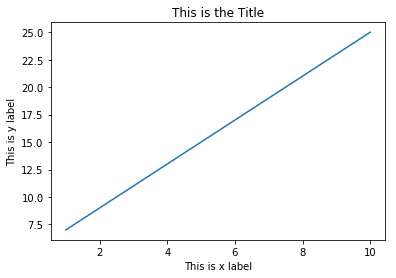

In [91]:
import numpy as np
from matplotlib import pyplot as plt
x = np.arange(1,11)
y = 2 * x + 5
plt.title('This is the Title')
plt.xlabel('This is x label')
plt.ylabel('This is y label')
plt.plot(x,y)
plt.show()

# Corey Schafer

In [1]:
import pandas as pd
df = pd.read_csv('/home/hitesh/Downloads/developer_survey_2019/survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [10]:
df.shape

(88883, 85)

In [5]:
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

In [6]:
schema_df = pd.read_csv('/home/hitesh/Downloads/developer_survey_2019/survey_results_schema.csv')
schema_df

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...
5,Employment,Which of the following best describes your cur...
6,Country,In which country do you currently reside?
7,Student,"Are you currently enrolled in a formal, degree..."
8,EdLevel,Which of the following best describes the high...
9,UndergradMajor,What was your main or most important field of ...


In [7]:
df['Hobbyist']

0        Yes
1         No
2        Yes
3         No
4        Yes
        ... 
88878    Yes
88879     No
88880     No
88881     No
88882    Yes
Name: Hobbyist, Length: 88883, dtype: object

In [10]:
df.loc[0:2, 'Hobbyist':'Employment']

,Hobbyist,OpenSourcer,OpenSource,Employment
0,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work"
1,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work"
2,Yes,Never,The quality of OSS and closed source software ...,Employed full-time


In [11]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'